# Beyound linearity

Nonlinear functions are estimated through different regression techniques.

- step functions, like nearest neighbours
- basis expansion, like polynomial regression, piecewise polynomials called "splines"
- local regression


# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='data/'
filename = path+'Wage.csv'
wage = pd.read_csv(filename)

In [2]:
from sklearn.preprocessing import PolynomialFeatures


X1 = PolynomialFeatures(1).fit_transform(wage[['age']])
X2 = PolynomialFeatures(2).fit_transform(wage[['age']])
X3 = PolynomialFeatures(3).fit_transform(wage[['age']])
X4 = PolynomialFeatures(4).fit_transform(wage[['age']])
X5 = PolynomialFeatures(5).fit_transform(wage[['age']])



In [3]:
from statsmodels.api import OLS


/Users/vahidpartovinia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
fit_1  = OLS(wage['wage'], X1).fit()
fit_2  = OLS(wage['wage'], X2).fit()
fit_3  = OLS(wage['wage'], X3).fit()
fit_4  = OLS(wage['wage'], X4).fit()
fit_5  = OLS(wage['wage'], X5).fit()
# c

In [5]:
# You may cross-validate to find the right order for the data.


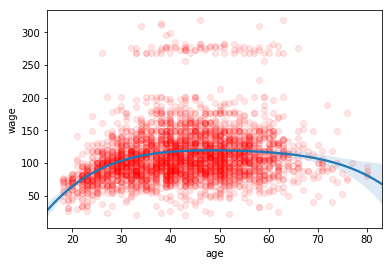

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# creating plots
# Scatter plot with polynomial regression line
sns.regplot(wage['age'], wage['wage'], order = 4,
            scatter_kws={"color":"r", "alpha":0.1});

# logistic regression


In [28]:
import statsmodels.api as sm
y = (wage['wage'] > 250).map({False:0, True:1})
lr = sm.GLM(y, X4, family=sm.families.Binomial(sm.families.links.logit))
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Fri, 20 Apr 2018   Deviance:                       701.22
Time:                        22:01:29   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.022    -202.956     -16.150
x1             8.9950      4.187      2.148      0.032       0.789      17.201
x2            -0.2816      0.135     -2.081      0.037      -0.547      -0.016
x3             0.0039      0.002      2.022      0.043       0.000       0.008
x4         -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
==============================================================================
"""

In [29]:
age_grid = np.arange(20, 80).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(age_grid)
y_hat = lr.predict(X_test)

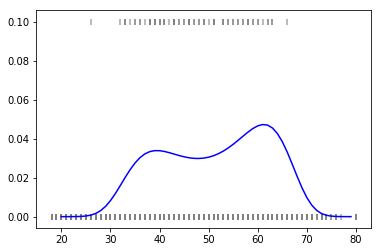

In [30]:
plt.plot(age_grid, y_hat, color='b')
plt.scatter(wage['age'], y/10, s=30, c='grey', marker='|', alpha=0.7)

In [31]:
# Local regression
from statsmodels.nonparametric.smoothers_lowess import lowess
xy = lowess(wage['wage'], wage['age'], frac=0.1)

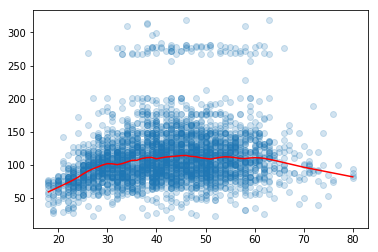

In [32]:
plt.scatter(wage['age'], wage['wage'], alpha=0.2)
plt.plot(xy[:,0],xy[:,1], 'red')